## Photo Restoration using inpainting
## What is computational photography? (عکاسی محاسباتی چیست؟)

- این‌ها تکنیک‌های پردازش تصویر دیجیتال هستند که روی تصاویر تولیدشده توسط دوربین‌ها اعمال می‌شوند.

- هدف آن‌ها بهبود تصویر از طریق پردازش محاسباتی است، نه استفاده از فرآیندهای اپتیکی گران‌قیمت (که هزینه بیشتری دارند و حجیم‌تر هستند).

- به طور گسترده در تمام دوربین‌ها به ویژه گوشی‌های هوشمند استفاده می‌شوند:
    - کاهش نویز
    - دامنه دینامیکی بالا
    - تثبیت تصویر
    - پانوراما
    - این‌پینتینگ (حذف نویزهای کوچک، خطوط و ...)

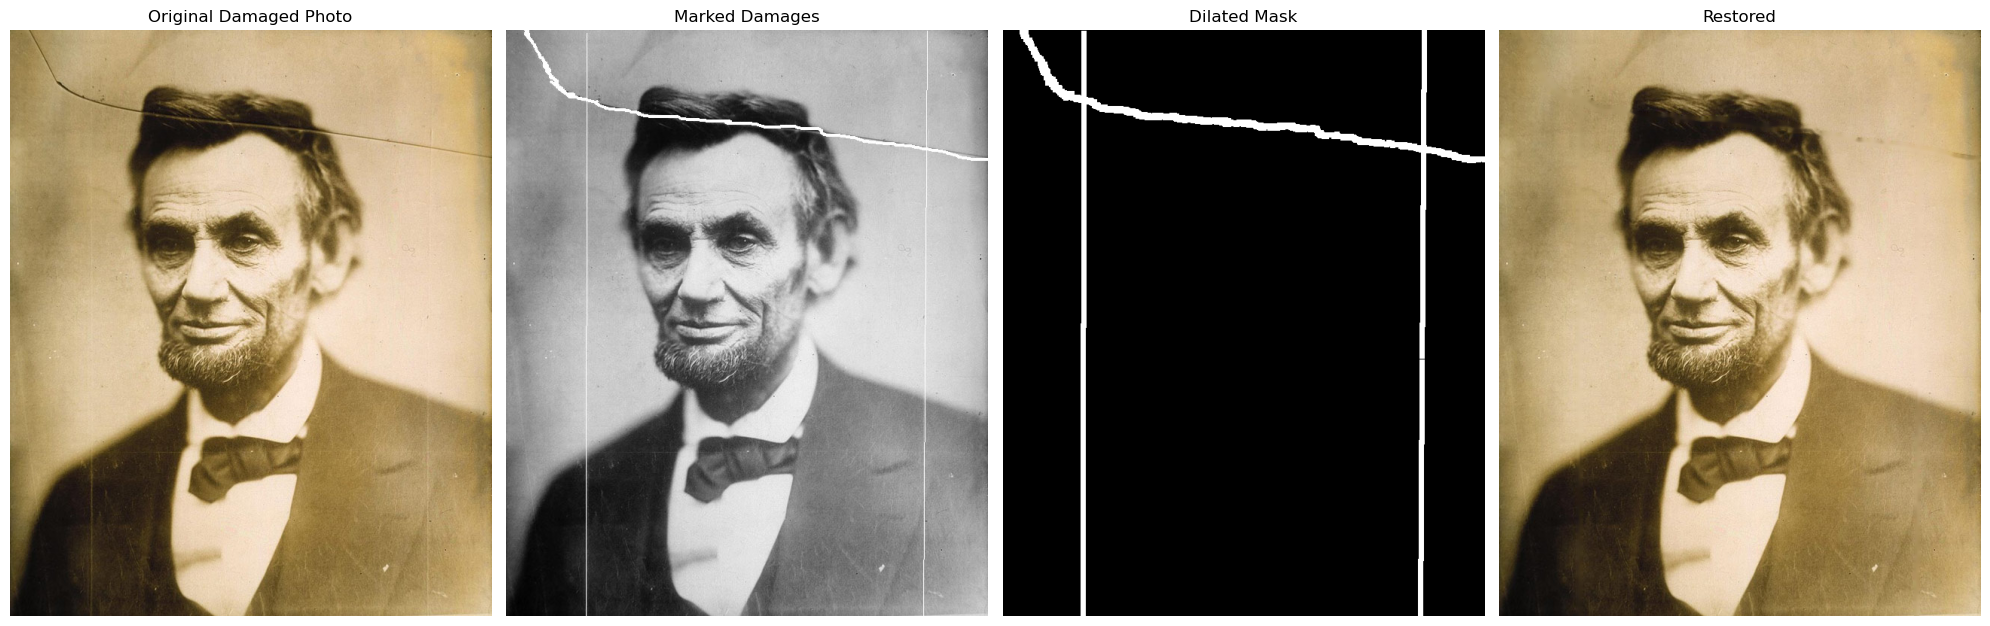

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load our damaged photo
image = cv2.imread('images/abraham.jpg')

# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('images/mask.jpg', 0)
if marked_damages is None:
    raise FileNotFoundError("Could not load 'images/mask.jpg'. Please check the file path.")


# Let's make a mask out of our marked image be changing all colors 
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)


# Let's dilate (make thicker) our the marks w made
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
cv2.imwrite("images/abraham_mask.png", mask)
restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)



# Show all steps using matplotlib
fig, axs = plt.subplots(1, 4, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Damaged Photo')
axs[0].axis('off')

axs[1].imshow(marked_damages, cmap='gray')
axs[1].set_title('Marked Damages')
axs[1].axis('off')

axs[2].imshow(mask, cmap='gray')
axs[2].set_title('Dilated Mask')
axs[2].axis('off')

axs[3].imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB))
axs[3].set_title('Restored')
axs[3].axis('off')

plt.tight_layout()
plt.show()


این کد با هدف بازسازی عکس‌های آسیب‌دیده با استفاده از تکنیک inpainting در OpenCV نوشته شده است. مراحل انجام کار به صورت زیر است:

1. ابتدا عکس آسیب‌دیده بارگذاری و نمایش داده می‌شود.
2. تصویر ماسک (عکسی که نواحی آسیب‌دیده در آن علامت‌گذاری شده) به صورت سیاه و سفید بارگذاری و نمایش داده می‌شود.
3. با استفاده از threshold، ماسک باینری ایجاد می‌شود؛ به این صورت که تمام پیکسل‌هایی که سفید نیستند به سیاه تبدیل می‌شوند.
4. برای ضخیم‌تر کردن نواحی ماسک (به دلیل باریک شدن پس از threshold)، عملیات dilate روی ماسک انجام می‌شود. نتیجه این مرحله نمایش داده شده و همچنین ذخیره می‌شود.
5. در نهایت با استفاده از تابع inpaint و روش Telea، نواحی آسیب‌دیده عکس بازسازی می‌شوند و تصویر نهایی نمایش داده می‌شود.

این فرآیند باعث می‌شود بخش‌های از دست رفته یا خراب‌شده عکس به شکل طبیعی‌تر و یکپارچه‌تر بازسازی شوند و کیفیت تصویر نهایی بهبود یابد.